<a href="https://colab.research.google.com/github/Reinaldos/Reinaldos/blob/main/Projeto_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = black> **Projeto Módulo 05 - Grupo 04**
###<font color = black>**Data Analytics - Turma 12 - Resilia**



# **<font color = #87CEEB > Análise exploratória relacionada a Cota para o Exercício da Atividade Parlamentar dos anos de 2019, 2020 e 2021**

###<font color = orange> **Fonte de Dados Utilizada:** 

*   Site oficial da câmara dos deputados - [Portal](https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/dados-abertos-cota-parlamentar)
*   Base de Dados CEAP referente aos anos de 2019,2020 e 2021


#<font color = #87CEEB> **1. O que é CEAP?**

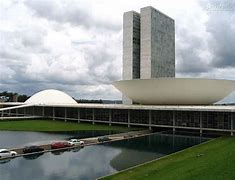


Resumidamente CEAP é a Cota para o Exercício da Atividade Parlamentar (CEAP), instituída pelo Ato da Mesa n. 43/2009, destina-se a custear gastos exclusivamente vinculados ao exercício do mandato, observados os limites mensais estabelecidos de acordo com o estado de origem do parlamentar, atendendo assim uma série de despesas

## IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS

In [ ]:
import pandas as pd #para ler, visualizar e printar infos do df
import matplotlib.pyplot as plt #para construir e customizar gráficos
import seaborn as sns #para visualizar uns gráficos
import numpy as np #numpy para auxiliar na análise
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import json
from urllib.request import urlopen
import plotly.graph_objects as go
import plotly as pt
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## IMPORTANDO O DATASET DOS PARLAMENTARES DE 2019

In [ ]:
dfparlamentar = pd.read_csv('/content/drive/My Drive/Ano-2019.csv', sep = ';')
dfparlamentar

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1554246,NaN,NaN,2812,6738121,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570078,NaN,NaN,2812,6769606,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570503,NaN,NaN,2812,6771099,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1579375,NaN,NaN,2812,6793690,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1590980,NaN,NaN,2812,6821674,http://camara.leg.br/cota-parlamentar/nota-fis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288987,Dr. Gonçalo,5.461154e+09,212625.0,548.0,2019,MA,REPUBLICANOS,56,999,PASSAGEM AÉREA - RPA,...,2019,0,Dr. Gonçalo,BSB/THE,0,0.0,NaN,3463,1722569,NaN
288988,Marcão Gomes,9.300886e+09,212749.0,551.0,2019,RJ,PL,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2019,0,NaN,NaN,1686035,NaN,NaN,3465,7035691,https://www.camara.leg.br/cota-parlamentar/doc...
288989,Marcão Gomes,9.300886e+09,212749.0,551.0,2019,RJ,PL,56,9,PASSAGEM AÉREA - REEMBOLSO,...,2019,0,NaN,NaN,1667677,NaN,NaN,3465,6995992,https://www.camara.leg.br/cota-parlamentar/doc...
288990,Marcão Gomes,9.300886e+09,212749.0,551.0,2019,RJ,PL,56,10,TELEFONIA,...,2019,0,NaN,NaN,0,0.0,NaN,3465,0,NaN


## IMPORTANDO O DATASET DOS PARLAMENTARES DE 2020

In [ ]:
 dfparlamentar20 = pd.read_csv('/content/drive/My Drive/Ano-2020.csv', sep = ';')
 dfparlamentar20

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1693866,NaN,NaN,2713,7050172,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1698547,NaN,NaN,2713,7058437,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1709149,NaN,NaN,2713,7078508,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1730495,NaN,NaN,2713,7123566,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2020,0,NaN,NaN,1703569,NaN,NaN,2713,7067718,http://camara.leg.br/cota-parlamentar/nota-fis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160898,Jorge Goetten,4.392800e+10,214694.0,563.0,2019,SC,PL,56,998,PASSAGEM AÉREA - SIGEPA,...,2020,0,JORGE GOETTEN DE LIMA,NVT/CGH/BSB,0,0.0,NaN,3473,18850,NaN
160899,Jorge Goetten,4.392800e+10,214694.0,563.0,2019,SC,PL,56,998,PASSAGEM AÉREA - SIGEPA,...,2020,0,ANA PAULA KANNENBERG HARTMANN,BSB/GRU/NVT,0,0.0,NaN,3473,19540,NaN
160900,Jorge Goetten,4.392800e+10,214694.0,563.0,2019,SC,PL,56,998,PASSAGEM AÉREA - SIGEPA,...,2020,0,JORGE GOETTEN DE LIMA,NVT/GRU/BSB,0,0.0,NaN,3473,19738,NaN
160901,Jorge Goetten,4.392800e+10,214694.0,563.0,2019,SC,PL,56,998,PASSAGEM AÉREA - SIGEPA,...,2020,0,JORGE GOETTEN DE LIMA,CGH/NVT,0,0.0,NaN,3473,20193,NaN


## IMPORTANDO O DATASET DOS PARLAMENTARES DE 2021

In [ ]:
 DFparlamentar21 = pd.read_csv('/content/drive/My Drive/Ano-2021.csv', sep = ';')
 DFparlamentar21

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2021,0,NaN,NaN,1751471,NaN,NaN,3453,7165735,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2021,0,NaN,NaN,1752542,NaN,NaN,3453,7167891,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2021,0,NaN,NaN,1753004,NaN,NaN,3453,7168798,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2021,0,NaN,NaN,1758032,NaN,NaN,3453,7178054,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2021,0,NaN,NaN,1760213,NaN,NaN,3453,7183245,http://camara.leg.br/cota-parlamentar/nota-fis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105600,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1781785,NaN,NaN,3486,7228378,https://www.camara.leg.br/cota-parlamentar/doc...
105601,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1785880,NaN,NaN,3486,7237484,https://www.camara.leg.br/cota-parlamentar/doc...
105602,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1782000,NaN,NaN,3486,7228945,https://www.camara.leg.br/cota-parlamentar/doc...
105603,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,10,TELEFONIA,...,2021,0,NaN,NaN,0,0.0,NaN,3486,0,NaN


Agora, vamos buscar mais informações dos dataframes acima:

## Verificando a porcentagem de nulos por coluna

In [ ]:
(dfparlamentar.isnull().sum() / dfparlamentar.shape[0]).sort_values(ascending=False)

vlrRestituicao               0.999166
txtDescricaoEspecificacao    0.775893
txtTrecho                    0.705148
txtPassageiro                0.702698
numRessarcimento             0.614166
urlDocumento                 0.419482
datEmissao                   0.021357
txtCNPJCPF                   0.012796
cpf                          0.003471
ideCadastro                  0.003132
nuCarteiraParlamentar        0.003132
sgUF                         0.003132
sgPartido                    0.003132
txtFornecedor                0.000052
numParcela                   0.000000
numLote                      0.000000
numMes                       0.000000
nuDeputadoId                 0.000000
ideDocumento                 0.000000
numAno                       0.000000
txNomeParlamentar            0.000000
vlrLiquido                   0.000000
vlrGlosa                     0.000000
vlrDocumento                 0.000000
txtNumero                    0.000000
numEspecificacaoSubCota      0.000000
txtDescricao

In [ ]:
(dfparlamentar20.isnull().sum() / dfparlamentar.shape[0]).sort_values(ascending=False)

vlrRestituicao               0.556420
txtTrecho                    0.456808
txtPassageiro                0.456016
txtDescricaoEspecificacao    0.418624
numRessarcimento             0.400672
urlDocumento                 0.188434
txtCNPJCPF                   0.040406
datEmissao                   0.020471
cpf                          0.001356
ideCadastro                  0.001356
nuCarteiraParlamentar        0.001356
sgUF                         0.001356
sgPartido                    0.001356
txtFornecedor                0.000062
numParcela                   0.000000
numLote                      0.000000
numMes                       0.000000
nuDeputadoId                 0.000000
ideDocumento                 0.000000
numAno                       0.000000
txNomeParlamentar            0.000000
vlrLiquido                   0.000000
vlrGlosa                     0.000000
vlrDocumento                 0.000000
txtNumero                    0.000000
numEspecificacaoSubCota      0.000000
txtDescricao

In [ ]:
(DFparlamentar21.isnull().sum() / dfparlamentar.shape[0]).sort_values(ascending=False)

vlrRestituicao               0.365353
txtTrecho                    0.315850
txtPassageiro                0.315400
numRessarcimento             0.281593
txtDescricaoEspecificacao    0.256467
urlDocumento                 0.104425
txtCNPJCPF                   0.029118
datEmissao                   0.012326
sgPartido                    0.001536
sgUF                         0.001536
nuCarteiraParlamentar        0.001536
ideCadastro                  0.001536
cpf                          0.001536
nuDeputadoId                 0.000000
numMes                       0.000000
numLote                      0.000000
ideDocumento                 0.000000
numParcela                   0.000000
numAno                       0.000000
txNomeParlamentar            0.000000
vlrLiquido                   0.000000
vlrGlosa                     0.000000
vlrDocumento                 0.000000
txtNumero                    0.000000
txtFornecedor                0.000000
numEspecificacaoSubCota      0.000000
txtDescricao

VERIFICANDO OS TIPOS DE DADOS PRESENTES NAS COLUNAS

In [ ]:

display(dfparlamentar.dtypes)
display(dfparlamentar20.dtypes)
display(DFparlamentar21.dtypes)

txNomeParlamentar             object
cpf                          float64
ideCadastro                  float64
nuCarteiraParlamentar        float64
nuLegislatura                  int64
sgUF                          object
sgPartido                     object
codLegislatura                 int64
numSubCota                     int64
txtDescricao                  object
numEspecificacaoSubCota        int64
txtDescricaoEspecificacao     object
txtFornecedor                 object
txtCNPJCPF                    object
txtNumero                     object
indTipoDocumento               int64
datEmissao                    object
vlrDocumento                 float64
vlrGlosa                     float64
vlrLiquido                   float64
numMes                         int64
numAno                         int64
numParcela                     int64
txtPassageiro                 object
txtTrecho                     object
numLote                        int64
numRessarcimento             float64
v

txNomeParlamentar             object
cpf                          float64
ideCadastro                  float64
nuCarteiraParlamentar        float64
nuLegislatura                  int64
sgUF                          object
sgPartido                     object
codLegislatura                 int64
numSubCota                     int64
txtDescricao                  object
numEspecificacaoSubCota        int64
txtDescricaoEspecificacao     object
txtFornecedor                 object
txtCNPJCPF                    object
txtNumero                     object
indTipoDocumento               int64
datEmissao                    object
vlrDocumento                 float64
vlrGlosa                     float64
vlrLiquido                   float64
numMes                         int64
numAno                         int64
numParcela                     int64
txtPassageiro                 object
txtTrecho                     object
numLote                        int64
numRessarcimento             float64
v

txNomeParlamentar             object
cpf                          float64
ideCadastro                  float64
nuCarteiraParlamentar        float64
nuLegislatura                  int64
sgUF                          object
sgPartido                     object
codLegislatura                 int64
numSubCota                     int64
txtDescricao                  object
numEspecificacaoSubCota        int64
txtDescricaoEspecificacao     object
txtFornecedor                 object
txtCNPJCPF                    object
txtNumero                     object
indTipoDocumento               int64
datEmissao                    object
vlrDocumento                 float64
vlrGlosa                     float64
vlrLiquido                   float64
numMes                         int64
numAno                         int64
numParcela                     int64
txtPassageiro                 object
txtTrecho                     object
numLote                        int64
numRessarcimento             float64
v

PODEMOS OBSERVAR QUE OS DATAFRAMES POSSUEM OS MESMOS TIPOS DE DADOS NAS MESMAS COLUNAS ISSO OS TORNA COMPATÍVEIS E NOS PERMITE UNI-LOS PARA FAZER UMA LIMPEZA MAIS PRECISA E OBJETIVA

In [ ]:
dfparlamentarcompleto2 = pd.concat([dfparlamentar ,dfparlamentar20 ,DFparlamentar21])

In [ ]:
dfparlamentarcompleto1 = pd.concat([dfparlamentar ,dfparlamentar20 ,DFparlamentar21])
dfparlamentarcompleto1

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1554246,NaN,NaN,2812,6738121,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570078,NaN,NaN,2812,6769606,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570503,NaN,NaN,2812,6771099,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1579375,NaN,NaN,2812,6793690,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1590980,NaN,NaN,2812,6821674,http://camara.leg.br/cota-parlamentar/nota-fis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105600,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1781785,NaN,NaN,3486,7228378,https://www.camara.leg.br/cota-parlamentar/doc...
105601,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1785880,NaN,NaN,3486,7237484,https://www.camara.leg.br/cota-parlamentar/doc...
105602,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1782000,NaN,NaN,3486,7228945,https://www.camara.leg.br/cota-parlamentar/doc...
105603,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,10,TELEFONIA,...,2021,0,NaN,NaN,0,0.0,NaN,3486,0,NaN


FAZENDO A VERIFICAÇÃO DE COLUNAS E POSSÍVEIS ERROS

In [ ]:
dfparlamentarcompleto1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555500 entries, 0 to 105604
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          555500 non-null  object 
 1   cpf                        553661 non-null  float64
 2   ideCadastro                553759 non-null  float64
 3   nuCarteiraParlamentar      553759 non-null  float64
 4   nuLegislatura              555500 non-null  int64  
 5   sgUF                       553759 non-null  object 
 6   sgPartido                  553759 non-null  object 
 7   codLegislatura             555500 non-null  int64  
 8   numSubCota                 555500 non-null  int64  
 9   txtDescricao               555500 non-null  object 
 10  numEspecificacaoSubCota    555500 non-null  int64  
 11  txtDescricaoEspecificacao  136177 non-null  object 
 12  txtFornecedor              555467 non-null  object 
 13  txtCNPJCPF                 53

Todos os dataframes tem o mesmo número de colunas, isso nos permite usar um código com drop(retirada) das colunas inúteis iniciando dessa forma a limpeza dos dados para análise posterior

In [ ]:
dfparlamentarcompleto2.columns

Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento'],
      dtype='object')

Dadas as perguntas vamos analizar quais das colunas são necessárias para nossa análise:

In [ ]:
dfparlamentarcompleto2.drop(['ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'codLegislatura',
       'numEspecificacaoSubCota',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'numParcela','numLote',
       'numRessarcimento','nuDeputadoId', 'ideDocumento',
       'urlDocumento'],axis='columns', inplace = True)

In [ ]:
dfparlamentarcompleto = dfparlamentarcompleto2

In [ ]:
dfparlamentarcompleto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555500 entries, 0 to 105604
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          555500 non-null  object 
 1   cpf                        553661 non-null  float64
 2   sgUF                       553759 non-null  object 
 3   sgPartido                  553759 non-null  object 
 4   numSubCota                 555500 non-null  int64  
 5   txtDescricao               555500 non-null  object 
 6   txtDescricaoEspecificacao  136177 non-null  object 
 7   datEmissao                 539850 non-null  object 
 8   vlrDocumento               555500 non-null  float64
 9   vlrGlosa                   555500 non-null  float64
 10  vlrLiquido                 555500 non-null  float64
 11  numMes                     555500 non-null  int64  
 12  numAno                     555500 non-null  int64  
 13  txtPassageiro              12

In [ ]:
# Convertendo a coluna "datEmissao" do tipo 'Object' para o tipo 'Datetime'
dfparlamentarcompleto['datEmissao'] = pd.to_datetime(dfparlamentarcompleto['datEmissao'], format = '%Y/%m/%d')

Como foi observado através da função .info(), o formato da coluna 'datEmissao' estava originalmente como do tipo 'Object' e esse formato não permite sua utilização em cálculos envolvendo datas, sendo assim convertido para o tipo 'Datetime'.

In [ ]:
#Filtro da coluna vlLiquido exibindo somente o que for >0.
liq_valor_positivo = dfparlamentarcompleto[dfparlamentarcompleto['vlrLiquido']>0]
liq_valor_positivo

,txNomeParlamentar,cpf,sgUF,sgPartido,numSubCota,txtDescricao,txtDescricaoEspecificacao,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho,vlrRestituicao
0,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-01-16,111.30,0.0,111.30,1,2019,NaN,NaN,NaN
1,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-02-04,117.19,0.0,117.19,2,2019,NaN,NaN,NaN
2,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-02-25,120.15,0.0,120.15,2,2019,NaN,NaN,NaN
3,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-03-28,151.18,0.0,151.18,3,2019,NaN,NaN,NaN
4,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-05-07,119.90,0.0,119.90,5,2019,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105600,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-07-28,5000.00,0.0,5000.00,7,2021,NaN,NaN,NaN
105601,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-08-11,7000.00,0.0,7000.00,8,2021,NaN,NaN,NaN
105602,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-07-29,4000.00,0.0,4000.00,7,2021,NaN,NaN,NaN
105603,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,10,TELEFONIA,NaN,NaT,1.10,0.0,1.10,7,2021,NaN,NaN,NaN


Depois de concatenar os 3 dataframes e retirar as colunas inúteis, ficamos com apenas 16 colunas

In [ ]:
dfparlamentarcompleto.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 555500 entries, 0 to 105604
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   txNomeParlamentar          555500 non-null  object        
 1   cpf                        553661 non-null  float64       
 2   sgUF                       553759 non-null  object        
 3   sgPartido                  555418 non-null  object        
 4   numSubCota                 555500 non-null  int64         
 5   txtDescricao               555500 non-null  object        
 6   txtDescricaoEspecificacao  136177 non-null  object        
 7   datEmissao                 539850 non-null  datetime64[ns]
 8   vlrDocumento               555500 non-null  float64       
 9   vlrGlosa                   555500 non-null  float64       
 10  vlrLiquido                 555500 non-null  float64       
 11  numMes                     555500 non-null  int64   

## Agora vamos organizar os  NAN

In [ ]:
sem_partido_sem_uf = dfparlamentarcompleto[dfparlamentarcompleto['sgUF'].isnull()][['txNomeParlamentar', 'sgUF', 'sgPartido','vlrLiquido']]
sem_partido_sem_uf

,txNomeParlamentar,sgUF,sgPartido,vlrLiquido
0,LID.GOV-CD,NaN,NaN,111.30
1,LID.GOV-CD,NaN,NaN,117.19
2,LID.GOV-CD,NaN,NaN,120.15
3,LID.GOV-CD,NaN,NaN,151.18
4,LID.GOV-CD,NaN,NaN,119.90
...,...,...,...,...
439,LIDMIN,NaN,NaN,4000.00
440,LIDMIN,NaN,NaN,137.97
441,LIDMIN,NaN,NaN,175.18
442,LIDMIN,NaN,NaN,3800.00


##Atribuindo os partidos correspondentes as despesas atribuídas apenas a lideranças

In [ ]:
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PSL", 'PSL', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PT", 'PT', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PTB", 'PTB', dfparlamentarcompleto.sgPartido) 
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PSDB", 'PSDB', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PODEMOS", 'PODEMOS', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO SOLIDARIEDADE", 'SOLIDARIEDADE', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PSD", 'PSD', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO NOVO", 'NOVO', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO DEMOCRATAS", 'DEMOCRATAS', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO CIDADANIA", 'CIDADANIA', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO AVANTE", 'AVANTE', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PDT", 'PDT', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PSOL", 'PSOL', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PROGRESSISTAS", 'PROGRESSISTAS', dfparlamentarcompleto.sgPartido)
dfparlamentarcompleto['sgPartido'] = np.where(dfparlamentarcompleto['txNomeParlamentar'] == "LIDERANÇA DO PARTIDO REPUBLICANO DA ORDEM SOCIAL", 'SOCIAL', dfparlamentarcompleto.sgPartido)

In [ ]:
dfparlamentarcompleto

,txNomeParlamentar,cpf,sgUF,sgPartido,numSubCota,txtDescricao,txtDescricaoEspecificacao,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho,vlrRestituicao
0,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-01-16,111.30,0.0,111.30,1,2019,NaN,NaN,NaN
1,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-02-04,117.19,0.0,117.19,2,2019,NaN,NaN,NaN
2,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-02-25,120.15,0.0,120.15,2,2019,NaN,NaN,NaN
3,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-03-28,151.18,0.0,151.18,3,2019,NaN,NaN,NaN
4,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-05-07,119.90,0.0,119.90,5,2019,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105600,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-07-28,5000.00,0.0,5000.00,7,2021,NaN,NaN,NaN
105601,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-08-11,7000.00,0.0,7000.00,8,2021,NaN,NaN,NaN
105602,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-07-29,4000.00,0.0,4000.00,7,2021,NaN,NaN,NaN
105603,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,10,TELEFONIA,NaN,NaT,1.10,0.0,1.10,7,2021,NaN,NaN,NaN


In [ ]:
parlamentar = dfparlamentarcompleto
parlamentar

,txNomeParlamentar,cpf,sgUF,sgPartido,numSubCota,txtDescricao,txtDescricaoEspecificacao,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho,vlrRestituicao
0,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-01-16,111.30,0.0,111.30,1,2019,NaN,NaN,NaN
1,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-02-04,117.19,0.0,117.19,2,2019,NaN,NaN,NaN
2,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-02-25,120.15,0.0,120.15,2,2019,NaN,NaN,NaN
3,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-03-28,151.18,0.0,151.18,3,2019,NaN,NaN,NaN
4,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-05-07,119.90,0.0,119.90,5,2019,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105600,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-07-28,5000.00,0.0,5000.00,7,2021,NaN,NaN,NaN
105601,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-08-11,7000.00,0.0,7000.00,8,2021,NaN,NaN,NaN
105602,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-07-29,4000.00,0.0,4000.00,7,2021,NaN,NaN,NaN
105603,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,10,TELEFONIA,NaN,NaT,1.10,0.0,1.10,7,2021,NaN,NaN,NaN


In [ ]:
parlamentar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555500 entries, 0 to 105604
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   txNomeParlamentar          555500 non-null  object        
 1   cpf                        553661 non-null  float64       
 2   sgUF                       553759 non-null  object        
 3   sgPartido                  555418 non-null  object        
 4   numSubCota                 555500 non-null  int64         
 5   txtDescricao               555500 non-null  object        
 6   txtDescricaoEspecificacao  136177 non-null  object        
 7   datEmissao                 539850 non-null  datetime64[ns]
 8   vlrDocumento               555500 non-null  float64       
 9   vlrGlosa                   555500 non-null  float64       
 10  vlrLiquido                 555500 non-null  float64       
 11  numMes                     555500 non-null  int64   

In [ ]:
parlamentar.count()

txNomeParlamentar            555500
cpf                          553661
sgUF                         553759
sgPartido                    555418
numSubCota                   555500
txtDescricao                 555500
txtDescricaoEspecificacao    136177
datEmissao                   539850
vlrDocumento                 555500
vlrGlosa                     555500
vlrLiquido                   555500
numMes                       555500
numAno                       555500
txtPassageiro                129493
txtTrecho                    128426
vlrRestituicao                  364
dtype: int64

In [ ]:
parlamentar = dfparlamentar[['txNomeParlamentar', 'sgUF']]
parlamentar

,txNomeParlamentar,sgUF
1,LID.GOV-CD,NaN
2,LID.GOV-CD,NaN
3,LID.GOV-CD,NaN
4,LID.GOV-CD,NaN
5,LID.GOV-CD,NaN
...,...,...
288987,Dr. Gonçalo,MA
288988,Marcão Gomes,RJ
288989,Marcão Gomes,RJ
288990,Marcão Gomes,RJ


In [ ]:
parlamentardropado = dfparlamentar.drop_duplicates()
parlamentardropado

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
1,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570078,NaN,NaN,2812,6769606,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570503,NaN,NaN,2812,6771099,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1579375,NaN,NaN,2812,6793690,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1590980,NaN,NaN,2812,6821674,http://camara.leg.br/cota-parlamentar/nota-fis...
5,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1602364,NaN,NaN,2812,6846469,http://camara.leg.br/cota-parlamentar/nota-fis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288987,Dr. Gonçalo,5.461154e+09,212625.0,548.0,2019,MA,REPUBLICANOS,56,999,PASSAGEM AÉREA - RPA,...,2019,0,Dr. Gonçalo,BSB/THE,0,0.0,NaN,3463,1722569,NaN
288988,Marcão Gomes,9.300886e+09,212749.0,551.0,2019,RJ,PL,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,...,2019,0,NaN,NaN,1686035,NaN,NaN,3465,7035691,https://www.camara.leg.br/cota-parlamentar/doc...
288989,Marcão Gomes,9.300886e+09,212749.0,551.0,2019,RJ,PL,56,9,PASSAGEM AÉREA - REEMBOLSO,...,2019,0,NaN,NaN,1667677,NaN,NaN,3465,6995992,https://www.camara.leg.br/cota-parlamentar/doc...
288990,Marcão Gomes,9.300886e+09,212749.0,551.0,2019,RJ,PL,56,10,TELEFONIA,...,2019,0,NaN,NaN,0,0.0,NaN,3465,0,NaN


In [ ]:
dfparlamentarcompleto1[['txNomeParlamentar','sgUF']]
dfparlamentarcompleto1

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1554246,NaN,NaN,2812,6738121,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570078,NaN,NaN,2812,6769606,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570503,NaN,NaN,2812,6771099,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1579375,NaN,NaN,2812,6793690,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1590980,NaN,NaN,2812,6821674,http://camara.leg.br/cota-parlamentar/nota-fis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105600,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1781785,NaN,NaN,3486,7228378,https://www.camara.leg.br/cota-parlamentar/doc...
105601,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1785880,NaN,NaN,3486,7237484,https://www.camara.leg.br/cota-parlamentar/doc...
105602,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2021,0,NaN,NaN,1782000,NaN,NaN,3486,7228945,https://www.camara.leg.br/cota-parlamentar/doc...
105603,Henrique do Paraíso,3.470995e+10,217036.0,588.0,2019,SP,REPUBLICANOS,56,10,TELEFONIA,...,2021,0,NaN,NaN,0,0.0,NaN,3486,0,NaN


##Eliminamos todos os nomes duplicados da coluna txNomeParlamentar utilizando o .drop_duplicate().

In [ ]:
parlamentar = dfparlamentarcompleto.drop_duplicates()
parlamentar

,txNomeParlamentar,cpf,sgUF,sgPartido,numSubCota,txtDescricao,txtDescricaoEspecificacao,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,txtPassageiro,txtTrecho,vlrRestituicao
0,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-01-16,111.30,0.0,111.30,1,2019,NaN,NaN,NaN
1,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-02-04,117.19,0.0,117.19,2,2019,NaN,NaN,NaN
2,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-02-25,120.15,0.0,120.15,2,2019,NaN,NaN,NaN
3,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-03-28,151.18,0.0,151.18,3,2019,NaN,NaN,NaN
4,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,2019-05-07,119.90,0.0,119.90,5,2019,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105600,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-07-28,5000.00,0.0,5000.00,7,2021,NaN,NaN,NaN
105601,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-08-11,7000.00,0.0,7000.00,8,2021,NaN,NaN,NaN
105602,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,2021-07-29,4000.00,0.0,4000.00,7,2021,NaN,NaN,NaN
105603,Henrique do Paraíso,3.470995e+10,SP,REPUBLICANOS,10,TELEFONIA,NaN,NaT,1.10,0.0,1.10,7,2021,NaN,NaN,NaN


## Análise Exploratória para Resolução das Questões Predefinidas:

### Nesta seção se segue a resolução das questões anteriormente definidas para a atividade de análise exploratória, que foram solucionadas seguindo os objetivos dessa análise. <p>As questões podem também ser conferidas na rubrica da atividade.</p>
<hr>

**As perguntas a serem respondidas são:**
1. Como se comportam os gastos com cotas parlamentares ao longo
do tempo? Existe alguma tendência de aumento ou redução desse
custo?
2. Qual a média de gastos por parlamentar?
3. Quais foram os parlamentares que mais e que menos consumiram
recursos?
4. Quais são as categorias de despesas mais onerosas dentre os
recursos destinados às cotas parlamentares?
5. Quais são os trechos de viagem mais recorrentes entre as despesas
de viagem?
6. Qual a média de gastos por estado?
7. Qual é o valor total de gastos por estado?
8. Quais estados têm maior número de representantes?
9. Há alguma correlação entre a quantidade de parlamentares por
estado e o valor total dos gastos?
10. Qual a média de gastos por partido?
11. Quais são os partidos que mais e que menos consumiram a
cota parlamentar?
12. Há alguma correlação entre a quantidade de parlamentares
por partido e o valor total dos gastos? 
 
**Questões Extras**

13. Média dos parlamentares
14. O partido que mais teve gastos em viagens
15. Média de gastos de viagens por partido







## 1 - Como se comportam os gastos com cotas parlamentares ao longo do tempo? 
><b>Existe alguma tendência de aumento ou redução desse custo?</b>

><b>Obs:</b> Utilizado como referência a coluna 'vlrLiquido' conforme discrimina o Dicionário de Dados: 
     <p>O seu conteúdo representa o valor líquido do documento fiscal ou do documento que deu causa à despesa
     e será calculado pela diferença entre o Valor do Documento e o Valor da Glosa. <p>É este valor que será 
     debitado da cota do deputado. Caso o débito seja do Tipo Telefonia e o valor seja igual a zero, significa
     que a despesa foi franqueada.

## 1.1 - Obtendo as despesas do período (2019 a 2021)

Aqui a opção foi usar o método dt.to_period('M') para agrupar os períodos por mês para facilitar a visualização

In [ ]:
despesas_por_mes = dfparlamentarcompleto.groupby(dfparlamentarcompleto['datEmissao'].dt.to_period('M'))['vlrLiquido'].sum().reset_index()

despesas_por_mes['mes'] = [ '2018-11', '2018-12', '2019-01', '2019-02', '2019-03',
             '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
             '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
             '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
             '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03',
             '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09']

Obs. para plotar o gráfico o agrupamento por período não foi aceito, então foi criada a coluna mês para identificar o período.

Quais são as categorias de despesas mais onerosas dentre os recursos destinados às cotas parlamentares?
Quais são os trechos de viagem mais recorrentes entre as despesas de viagem?
Qual a média de gastos por estado?

## 1.2 - Representação gráfica das despesas ao longo do período:

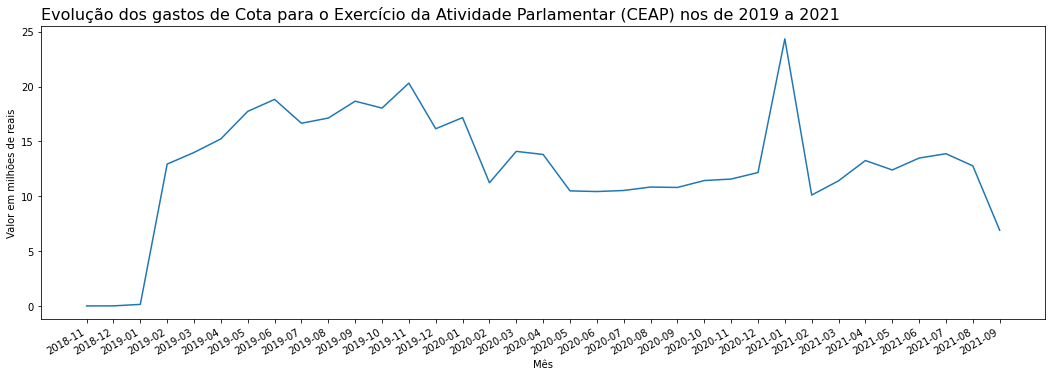

In [ ]:
date = despesas_por_mes['mes']

value = despesas_por_mes["vlrLiquido"] / 1000000

fig, ax = plt.subplots(figsize=(18, 6))

# Adiconando títulos
plt.title("Evolução dos gastos de Cota para o Exercício da Atividade Parlamentar (CEAP) nos de 2019 a 2021 ", loc='left', fontsize=16, fontweight=0)
plt.xlabel("Mês")
plt.ylabel("Valor em milhões de reais")

# rotacionar das datas
fig.autofmt_xdate()

plt.plot(date, value)
print()

<hr>
<a id="q_02"></a>

## 2.0 - Qual a média de gastos por parlamentar?

O primeiro passo foi definir a métrica de média, pode ser por região, tempo ou outros indicadores, inicialmente será apresentada a média por mês. Porém como na base de dados temos duas candidaturas, vamos separar as duas para que quem teve mais tempo de atuação não seja comparado com quem teve menor tempo. 

In [ ]:
# somando o valor total por deputado
a = dfparlamentarcompleto[['txNomeParlamentar', 'vlrLiquido']].drop_duplicates().groupby('txNomeParlamentar').sum().reset_index()

#contando quantos meses cada parlamentar ficou atuante
b = dfparlamentarcompleto[['txNomeParlamentar','numMes','numAno']].drop_duplicates().groupby('txNomeParlamentar').count().reset_index()

# juntando os dados
media_gastos = a.merge(b, left_on='txNomeParlamentar', right_on='txNomeParlamentar')

# criando uma coluna com a média de gastos por mês atuante
media_gastos['media_mes'] = (media_gastos.vlrLiquido / media_gastos.numMes)


media_gastos

,txNomeParlamentar,vlrLiquido,numMes,numAno,media_mes
0,ABEL MESQUITA JR.,45888.19,1,1,45888.190000
1,ADAIL CARNEIRO,42249.14,1,1,42249.140000
2,ADALBERTO CAVALCANTI,37422.25,1,1,37422.250000
3,ADELMO CARNEIRO LEÃO,36059.69,2,2,18029.845000
4,ADELSON BARRETO,20214.53,1,1,20214.530000
...,...,...,...,...,...
841,Zé Silva,479167.89,32,32,14973.996563
842,Zé Vitor,451472.62,31,31,14563.632903
843,Átila Lins,798359.23,32,32,24948.725937
844,Átila Lira,279728.84,31,31,9023.510968


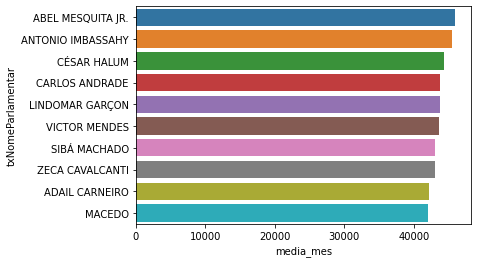

In [ ]:
sns.barplot(x="media_mes", y="txNomeParlamentar", data=media_gastos.sort_values(by='media_mes', ascending=False)[:10])
print()

In [ ]:
desp_media_parlamentar = dfparlamentarcompleto[['txNomeParlamentar','sgPartido', 'vlrLiquido']].groupby(['txNomeParlamentar', 'sgPartido']).mean().sort_values('vlrLiquido',ascending=False).round(2)

desp_media_parlamentar.rename(columns={'vlrLiquido':'Despesa Média R$'}, inplace=True)

desp_media_parlamentar = desp_media_parlamentar.head()

desp_media_parlamentar.style.format({'Despesa Média R$':'R$ {:.2F}'}).background_gradient(cmap='Reds')

,,Despesa Média R$
txNomeParlamentar,sgPartido,
JOSÉ REINALDO,PSDB,R$ 13452.61
ALBERTO FRAGA,DEM,R$ 10214.52
DELEGADO FRANCISCHINI,PSL,R$ 8975.94
HEULER CRUVINEL,PP,R$ 8881.52
CÉSAR HALUM,PRB,R$ 8865.13


<hr>
<a id="q_03"></a>

## 3 - Quais foram os parlamentares que mais e que menos consumiram recursos?

## 3.1 - Exibindo o Parlamentar que consumiu mais recursos no Período de 2019 a 2021:

In [ ]:
desp_maxima_parlamentar = dfparlamentarcompleto[['txNomeParlamentar','sgPartido', 'vlrLiquido']].groupby(['txNomeParlamentar', 'sgPartido']).sum().sort_values('vlrLiquido',ascending=False).round(2)

desp_maxima_parlamentar.rename(columns={'vlrLiquido':'Despesas Máximas R$'}, inplace=True)

desp_maxima_parlamentar = desp_maxima_parlamentar.head()

desp_maxima_parlamentar.style.format({'Despesas Máximas R$':'R$ {:.2F}'}).background_gradient(cmap='Reds')

,,Despesas Máximas R$
txNomeParlamentar,sgPartido,
Jéssica Sales,MDB,R$ 1415460.06
Flaviano Melo,MDB,R$ 1331748.68
João Maia,PL,R$ 1331131.21
Wellington Roberto,PL,R$ 1328756.77
Silas Câmara,REPUBLICANOS,R$ 1311577.46


## 3.1.1 - Variante com a maior despesa única de um parlamentar

In [ ]:
desp_maxima_parlamentar = dfparlamentarcompleto[['txNomeParlamentar','sgPartido', 'vlrLiquido']].groupby(['txNomeParlamentar', 'sgPartido']).max().sort_values('vlrLiquido',ascending=False).round(2)

desp_maxima_parlamentar.rename(columns={'vlrLiquido':'Maior Despesa R$'}, inplace=True)

desp_maxima_parlamentar = desp_maxima_parlamentar.head()

desp_maxima_parlamentar.style.format({'Maior Despesa R$':'R$ {:.2F}'}).background_gradient(cmap='Reds')

,,Maior Despesa R$
txNomeParlamentar,sgPartido,
Edmilson Rodrigues,PSOL,R$ 151260.00
Weliton Prado,PROS,R$ 145140.00
Rogério Correia,PT,R$ 144640.00
Raimundo Costa,PL,R$ 110000.00
Professora Dorinha Seabra Rezende,DEM,R$ 109500.00


## 3.2 - Exibindo o Parlamentar consumiu menos recursos no Período de 2019 a 2021:

In [ ]:
desp_minima_parlamentar = dfparlamentarcompleto[['txNomeParlamentar','sgPartido', 'vlrLiquido']].groupby(['txNomeParlamentar', 'sgPartido']).sum().sort_values('vlrLiquido',ascending=True).round(2)

desp_minima_parlamentar.rename(columns={'vlrLiquido':'Despesa Mínima R$'}, inplace=True)

desp_minima_parlamentar = desp_minima_parlamentar.head()

desp_minima_parlamentar.style.format({'Despesa Mínima R$':'R$ {:.2F}'}).background_gradient(cmap='Reds')

,,Despesa Mínima R$
txNomeParlamentar,sgPartido,
Jorge Goetten,PL,R$ -24402.70
Renato Queiroz,MDB,R$ -9107.21
FELIPE BORNIER,PROS,R$ -1675.06
LUCIANA SANTOS,PCdoB,R$ 0.49
MANDETTA,DEM,R$ 0.60


##4 - Quais são as categorias de despesas mais onerosas dentre os recursos destinados às cotas parlamentares?

In [ ]:
Maisonerosas = dfparlamentarcompleto.groupby('txtDescricaoEspecificacao').agg({'vlrDocumento': ['max']}).copy()
Maisonerosas

,vlrDocumento
,max
txtDescricaoEspecificacao,
Aeronaves,7771.00
Embarcações,6000.00
Sem especificações,6018.77
Veículos Automotores,9535.03


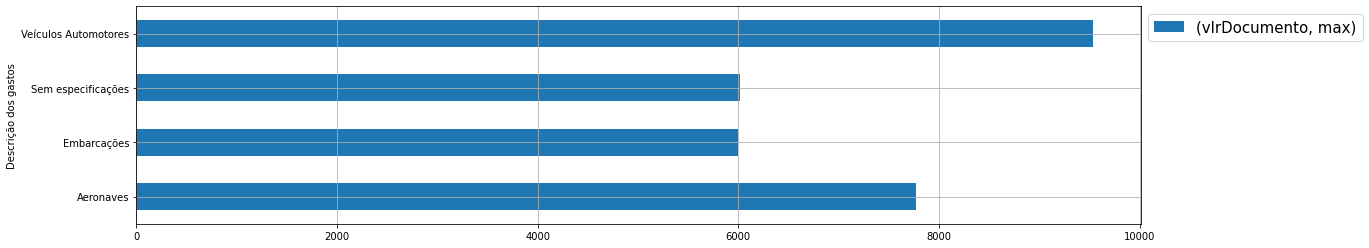

In [497]:
grafico_comparação = Maisonerosas.plot.barh(xlabel = 'Descrição dos gastos',figsize =(18,4),fontsize = 10)
plt.legend(fontsize = 15,loc = 0, bbox_to_anchor = (1,1))
grafico_comparação.grid()

##5 - Quais são os trechos de viagem mais recorrentes entre as despesas de viagem

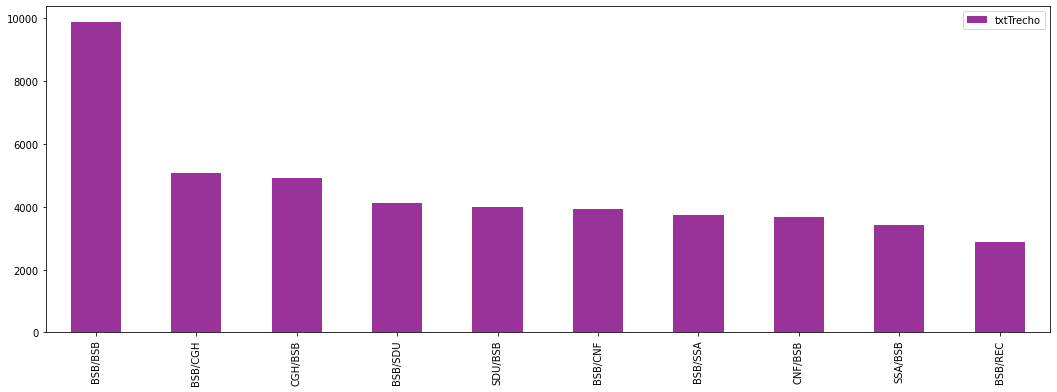

In [387]:
trechosrecorrentes = dfparlamentarcompleto['txtTrecho'].value_counts()
dfTrechos = pd.DataFrame(trechosrecorrentes)
dfTrechos = dfTrechos.head(10)
graficotrecho = dfTrechos.plot.bar(figsize =(18,6),fontsize = 10, color = '#993399')

##6 - Qual a média de gastos por estado?

In [482]:
gastosporestado = dfparlamentarcompleto[['vlrDocumento','sgUF']]


In [483]:
gastos_por_estado_media = gastosporestado.groupby('sgUF').agg({'vlrDocumento':['mean']}).copy()

In [484]:
gastos_por_estado_media

,vlrDocumento
,mean
sgUF,
AC,1601.271119
AL,1473.456565
AM,1606.099154
AP,1944.971260
BA,979.921451
CE,1245.679204
DF,1553.381828
ES,936.424195


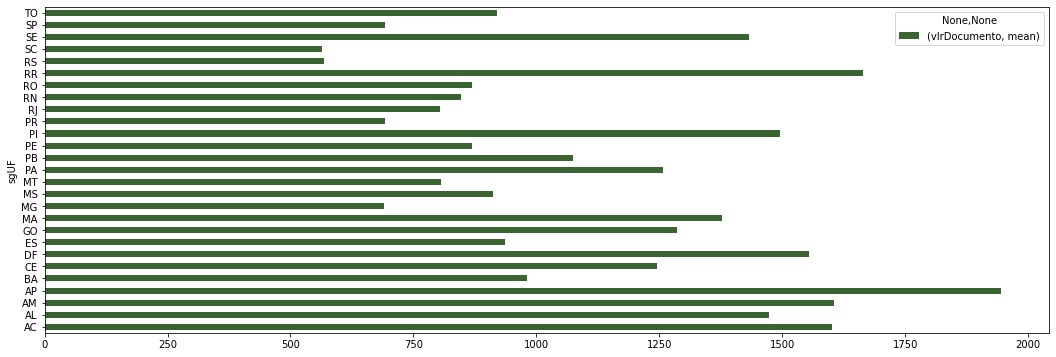

In [480]:
dfGastos = pd.DataFrame(gastos_por_estado_media)
dfGastos = dfGastos.head(30)
graficogastos = dfGastos.plot.barh(figsize =(18,6),fontsize = 10, color = '#3a6332')


##7. Qual é o valor total de gastos por estado?

In [485]:
parlamentar_drop_colunas = dfparlamentar.drop(columns=['ideCadastro', 'nuCarteiraParlamentar', 'nuLegislatura', 'numParcela', 'datEmissao', 'codLegislatura', 'numEspecificacaoSubCota', 'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento', 'txtPassageiro', 'numLote', 'numRessarcimento', 'nuDeputadoId', 'ideDocumento', 'urlDocumento'])
parlamentar_drop_colunas
# Da linha 15 até a linha 878 é só liderança de partidos.

,txNomeParlamentar,cpf,sgUF,sgPartido,numSubCota,txtDescricao,txtDescricaoEspecificacao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,txtTrecho,vlrRestituicao
1,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,117.19,0.0,117.19,2,2019,NaN,NaN
2,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,120.15,0.0,120.15,2,2019,NaN,NaN
3,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,151.18,0.0,151.18,3,2019,NaN,NaN
4,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,119.90,0.0,119.90,5,2019,NaN,NaN
5,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,151.54,0.0,151.54,6,2019,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288987,Dr. Gonçalo,5.461154e+09,MA,REPUBLICANOS,999,PASSAGEM AÉREA - RPA,NaN,1930.57,0.0,1930.57,12,2019,BSB/THE,NaN
288988,Marcão Gomes,9.300886e+09,RJ,PL,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,233.00,0.0,233.00,12,2019,NaN,NaN
288989,Marcão Gomes,9.300886e+09,RJ,PL,9,PASSAGEM AÉREA - REEMBOLSO,NaN,1890.66,0.0,1890.66,12,2019,NaN,NaN
288990,Marcão Gomes,9.300886e+09,RJ,PL,10,TELEFONIA,NaN,1.19,0.0,1.19,12,2019,NaN,NaN


In [486]:
liq_valor_positivo = parlamentar_drop_colunas[parlamentar_drop_colunas['vlrLiquido']>0]
liq_valor_positivo

,txNomeParlamentar,cpf,sgUF,sgPartido,numSubCota,txtDescricao,txtDescricaoEspecificacao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,txtTrecho,vlrRestituicao
1,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,117.19,0.0,117.19,2,2019,NaN,NaN
2,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,120.15,0.0,120.15,2,2019,NaN,NaN
3,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,151.18,0.0,151.18,3,2019,NaN,NaN
4,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,119.90,0.0,119.90,5,2019,NaN,NaN
5,LID.GOV-CD,NaN,NaN,NaN,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,151.54,0.0,151.54,6,2019,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288987,Dr. Gonçalo,5.461154e+09,MA,REPUBLICANOS,999,PASSAGEM AÉREA - RPA,NaN,1930.57,0.0,1930.57,12,2019,BSB/THE,NaN
288988,Marcão Gomes,9.300886e+09,RJ,PL,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,233.00,0.0,233.00,12,2019,NaN,NaN
288989,Marcão Gomes,9.300886e+09,RJ,PL,9,PASSAGEM AÉREA - REEMBOLSO,NaN,1890.66,0.0,1890.66,12,2019,NaN,NaN
288990,Marcão Gomes,9.300886e+09,RJ,PL,10,TELEFONIA,NaN,1.19,0.0,1.19,12,2019,NaN,NaN


In [487]:
gasto_total_estado = liq_valor_positivo.groupby('sgUF').sum().sort_values('vlrLiquido', ascending=False).reset_index()
gasto_total_estado.head(11)

,sgUF,cpf,numSubCota,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,vlrRestituicao
0,SP,8.539480e+14,11138392,24269452.87,90556.84,24147567.94,276916,81527220,0.0
1,MG,1.141348e+15,7711142,18506078.11,72003.85,18395714.80,213878,62502183,0.0
2,RJ,6.309440e+14,7973095,17126270.33,73923.07,17031147.31,164152,48619539,0.0
3,BA,5.514932e+14,6124561,17092517.26,72404.87,16979670.12,139142,41195676,0.0
4,RS,9.419637e+14,4828771,12153061.55,57017.14,12042573.85,158831,46483437,0.0
5,PR,6.462217e+14,5207048,11892469.82,48847.10,11828218.78,134682,40081188,0.0
6,PE,3.923558e+14,4261042,11200516.17,52074.75,11143308.11,86225,25451514,0.0
7,CE,3.934217e+14,3713014,10310648.66,39001.00,10239455.90,62138,18177057,0.0
8,PA,1.590383e+14,2778686,8003155.78,49089.79,7939763.99,46913,14070411,0.0
9,MA,2.886440e+14,2187450,7830063.78,47135.81,7773068.02,44532,13280982,0.0


In [495]:
gasto_total_estado[['sgUF','vlrLiquido']].groupby(['sgUF']).sum().sort_values(by=['vlrLiquido'], ascending = False).reset_index()

,sgUF,vlrLiquido
0,SP,24147567.94
1,MG,18395714.80
2,RJ,17031147.31
3,BA,16979670.12
4,RS,12042573.85
5,PR,11828218.78
6,PE,11143308.11
7,CE,10239455.90
8,PA,7939763.99
9,MA,7773068.02


##8. Quais estados têm maior número de representantes? *
    OBS: CRIAR UM HEAD PRA REDUZIR AS LINHAS ATÉ 5 E GERAR GRÁFICO

In [ ]:
dfparlamentar = dfparlamentar[dfparlamentar['codLegislatura']==56]

In [ ]:
dfparlamentar = dfparlamentar.query('vlrLiquido > 0')

In [ ]:
representante_por_uf = parlamentar_drop_colunas[['txNomeParlamentar', 'sgUF']].drop_duplicates().reset_index()
representante_por_uf

In [ ]:
parlamentar_por_uf = representante_por_uf.groupby('sgUF').count().sort_values('txNomeParlamentar', ascending=False).reset_index()
parlamentar_por_uf.drop(columns = ['index'], inplace = True)
parlamentar_por_uf

## 9. Há alguma correlação entre a quantidade de parlamentares por estado e o valor total dos gastos?

In [ ]:
representante_por_uf = parlamentar_drop_colunas[['txNomeParlamentar', 'sgUF']].drop_duplicates().reset_index()

In [ ]:
gasto_total_estado = liq_valor_positivo.groupby('sgUF').sum().sort_values('vlrLiquido', ascending=False).reset_index()
gasto_total_estado.head(11)

In [ ]:
parlamentar_por_uf = representante_por_uf.groupby('sgUF').count().sort_values('txNomeParlamentar', ascending=False).reset_index()
parlamentar_por_uf.drop(columns = ['index'], inplace = True)
parlamentar_por_uf

In [ ]:
parl_liq_estado = pd.merge(parlamentar_por_uf, gasto_total_estado, on = 'sgUF')
parl_liq_estado

In [ ]:
#Normalização em dataframe
scaler_01 = MinMaxScaler() 

dados_normalizados = scaler_01.fit_transform(parl_liq_estado[['txNomeParlamentar', 'vlrLiquido']])
dados_normalizados

In [ ]:
#Normalização em dataframe
dados_normalizados2 = pd.DataFrame(dados_normalizados)

dados_normalizados2.rename(columns={0:'Numero_de_representantes_uf', 1:'Total_de_Gastos'}, inplace=True)

dados_normalizados2

In [ ]:
# Exibindo correlação muito alta já que 1 e 0,98 estão positivamente muito próximas. 
dados_normalizados_var = dados_normalizados2.corr()
dados_normalizados_var

In [ ]:
sns.heatmap(dados_normalizados_var, 
        xticklabels= dados_normalizados_var.columns,
        yticklabels= dados_normalizados_var.columns, annot=True, cmap="RdBu_r", vmin=-1, vmax=1)
print()


## 13 - A média dos parlamentares

In [ ]:
media_parlamentares = dfparlamentarcompleto['vlrDocumento'].mean()
media_parlamentares

## 14 - O partido que mais teve gastos em viagens




---



In [ ]:
maiorGastoViagens = dfparlamentarcompleto.groupby('sgPartido')['vlrDocumento'].sum().sort_values(ascending=False).head(5).copy()
maiorGastoViagens


In [ ]:
partidos = maiorGastoViagens.filter('sgPartido')
despesas = maiorGastoViagens.filter('vlrLiquido')
plt.figure(figsize=(12,6))
plt.bar(partidos,despesas)

sg_Partidos = ['PT', 'PSL', 'PL' , 'PP', 'MDB']
vlr_Liquido = [ 53101273.58, 38739174.80, 36009565.01, 34429101.14, 31505872.66]
plt.bar(sg_Partidos, vlr_Liquido)

## 15 - Qual é a média de gastos com viagens por partido?

In [ ]:
maiorMediaGastopartido = dfparlamentarcompleto.groupby('sgPartido')['vlrLiquido'].mean().sort_values(ascending=False).copy
maiorMediaGastopartido

In [ ]:
maiorMediaGastopartido = dfparlamentarcompleto.groupby(['sgPartido']).agg({'vlrLiquido':['mean']}).copy()
maiorMediaGastopartido